In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
df=pd.read_csv('encoded_car_data (1).csv')
df.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [3]:
df=pd.get_dummies(df,drop_first=True)

In [4]:
X=df.drop('price',axis=1)
y=df['price']

In [5]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
models={
    "Ridge":Ridge(alpha=1.0),
    "Lasso":Lasso(alpha=1.0),
    "ElasticNet":ElasticNet(alpha=1.0,l1_ratio=0.5)
}
results={}

In [8]:
for name,model in models.items():
    pipeline=Pipeline([
        ('poly',PolynomialFeatures(degree=2)),
    ('regressor',model)
    ])
    pipeline.fit(X_train,y_train)
    predictions=pipeline.predict(X_test)

In [9]:
mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)
results[name]={'MSE':mse,'MAE':mae,'R2 Score':r2}

In [10]:
print('Name: POPURI SAHITHYA')
print('Reg. No:212225240106')
for model_name,metrics in results.items():
    print(f"{model_name} -Mean Squared Error: {metrics['MSE']:.2f},R2 Score: {metrics['R2 Score']:.2f},Mean Absolute Error: {metrics['MAE']:.2f}")

Name: POPURI SAHITHYA
Reg. No:212225240106
ElasticNet -Mean Squared Error: 0.63,R2 Score: 0.49,Mean Absolute Error: 0.59


In [11]:
results_df=pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'},inplace=True)
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

(array([0]), [Text(0, 0, 'ElasticNet')])

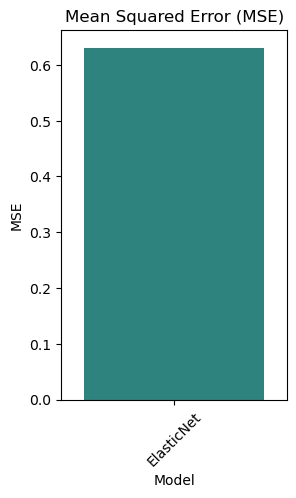

In [12]:
plt.subplot(1,2,1)
sns.barplot(x='Model',y='MSE',data=results_df,palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)

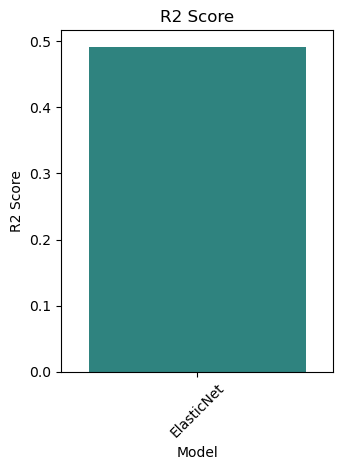

In [13]:
plt.subplot(1,2,2)
sns.barplot(x='Model',y='R2 Score',data=results_df,palette='viridis')
plt.title('R2 Score')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()